![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/4bd64c1deb3c4ffb8ca7ff93c1f1497d).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Importación librerías
import pandas as pd
import numpy as np

In [24]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)

In [25]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [26]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [27]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])

In [28]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,33090.508914
1,76303.572981
2,59899.545636
3,49899.386315
4,16701.398033


               Price           Year       Mileage
count  400000.000000  400000.000000  4.000000e+05
mean    21146.919312    2013.198125  5.507296e+04
std     10753.664940       3.292326  4.088102e+04
min      5001.000000    1997.000000  5.000000e+00
25%     13499.000000    2012.000000  2.584100e+04
50%     18450.000000    2014.000000  4.295500e+04
75%     26999.000000    2016.000000  7.743300e+04
max     79999.000000    2018.000000  2.457832e+06


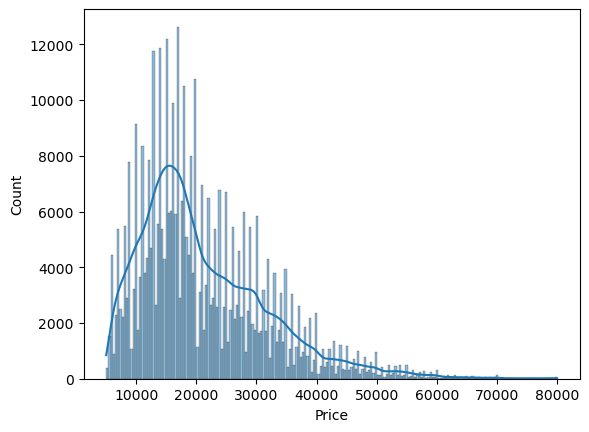

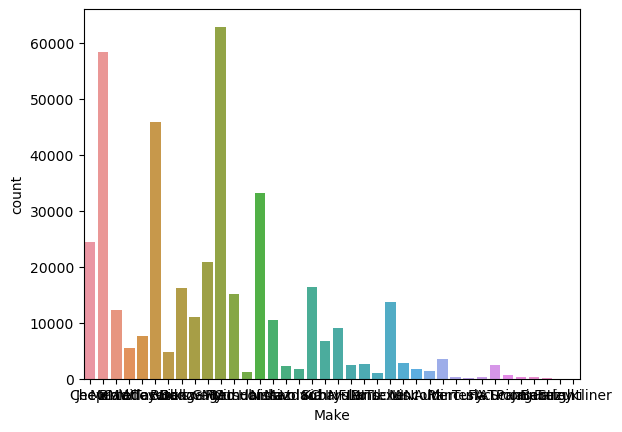

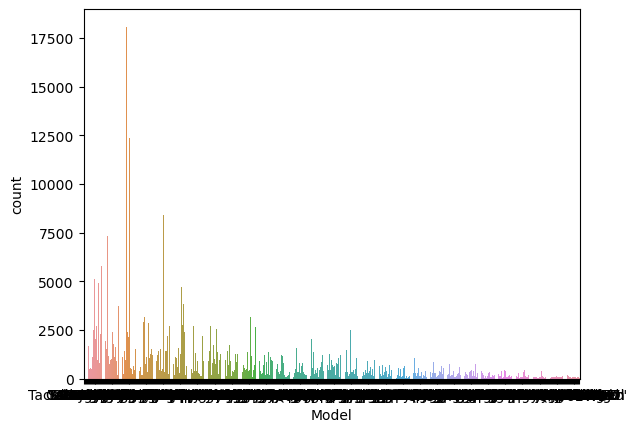

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resumen estadístico de las variables numéricas
print(dataTraining.describe())

# Histograma de la variable objetivo (precio)
sns.histplot(data=dataTraining, x='Price', kde=True)
plt.show()

# Gráfico de barras de la variable categórica (marca)
sns.countplot(data=dataTraining, x='Make')
plt.show()
# Gráfico de barras de la variable categórica (marca)
sns.countplot(data=dataTraining, x='Model')
plt.show()

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Preparación de los datos
X_train = dataTraining.drop(['Price'], axis=1)
y_train = dataTraining['Price']
X_test = dataTesting

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
# Modelo de árbol de decisión
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('RMSE del modelo de árbol de decisión:', mean_squared_error(y_pred_dt, y_test, squared=False))

# Modelo de bosques aleatorios
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('RMSE del modelo de bosques aleatorios:', mean_squared_error(y_pred_rf, y_test, squared=False))

# Modelo de gradient boosting
gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print('RMSE del modelo de gradient boosting:', mean_squared_error(y_pred_gb, y_test, squared=False))


ValueError: could not convert string to float: ' OH'